In [72]:
import numpy as np
import matplotlib.pyplot as plt
from ppr.robot import Robot_3R
from ppr.path import TrajectoryPt, TolerancedNumber
from ppr.geometry import Rectangle

# Problem setup

In [73]:
# ROBOT
robot1 = Robot_3R([2, 2, 2])

# PATH
dx    = np.linspace(3, 4, 10)
dy    = TolerancedNumber(1.0, 1.0, 1.1, samples=5)
angle = TolerancedNumber(0.0, -np.pi/2, np.pi/2, samples=10)
path1 = [TrajectoryPt([xi, dy, angle]) for xi in dx]

# COLLISION SCENE
sc1 = [Rectangle(3.7, 1.3, 2, 1, -0.1)]
sc2 = [Rectangle(3, 1.3, 2, 1, -0.1),
       Rectangle(3, 0.5, 2, 0.3, 0)]

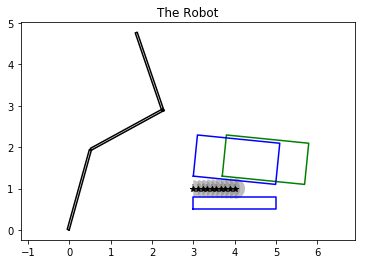

In [74]:
fig1, ax1 = plt.subplots()
plt.title("The Robot")
ax1.axis('equal')
robot1.plot(ax1, [1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax1)
for r in sc1: r.plot(ax1, 'g')
for r in sc2: r.plot(ax1, 'b')
plt.show()

# Solve problem
## Sampling based

In [75]:
from ppr.path import cart_to_joint
from ppr.path import get_shortest_path

In [76]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

In [77]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
[89 15 33 69 79 77 77 61 47 55]
True


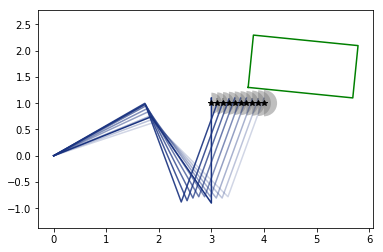

In [78]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[4])
robot1.plot_path_kinematics(ax2, sol['path'])
for r in sc1: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

In [79]:
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc2)

In [80]:
sol2 = get_shortest_path(path_js)
print(sol2['success'])

converting type of Q
[79 11 43  7 17  3  3  3  3  3]
True


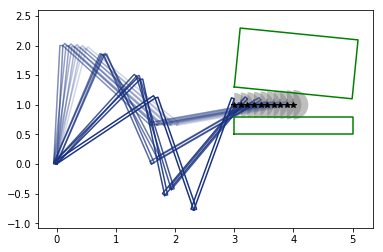

In [81]:
fig2, ax2 = plt.subplots()
ax2.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[4])
robot1.plot_path(ax2, sol2['path'])
for r in sc2: r.plot(ax2, 'g')
for tp in path1: tp.plot(ax2)
plt.show()

I'm not sure if this is really the shortest path, because the genetic algorithm came up with the following solution:
<img src="image/good_solution.png">

According the the terminal output, the path found with dijkstra has a cost of 1.04033.
Whereas the ga solution shown above had a cost of 1.10321. Are the cost functions correct??

## Use genetic algorithm instead of graph search

In [82]:
from ppr.ga import get_shortest_path_ga

In [83]:
sol_ga = get_shortest_path_ga(path_js, mut_rate=0.2, cross_rate=0.9, pop_size=100, gen=500)
print(sol_ga['length'])

1.09283


Verschillende runs leveren zeer verschillende resultaten op voor population size 100 en with 500 generations.

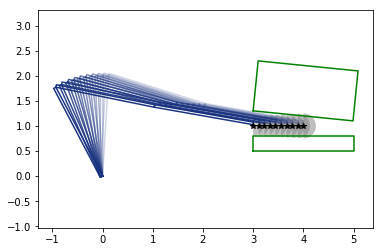

In [84]:
fig3, ax3 = plt.subplots()
ax3.axis('equal')
#robot1.plot_path_kinematics(ax2, path_js[4])
robot1.plot_path(ax3, sol_ga['path'])
for r in sc2: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
plt.show()

## Compare cost functions

In [85]:
qp_dk = sol2['path']
qp_ga = sol_ga['path']

In [86]:
def cost_ga(qp):
    temp = np.array(qp)
    dp   = np.diff(temp, axis=0)
    return -np.sum(np.abs(dp))

def cost_dk(qp):
    cost = 0
    for i in range(len(qp)-1):
        for j in range(robot1.ndof):
            cost += abs(qp[i][j] - qp[i+1][j])
    return cost

In [87]:
print(cost_ga(qp_ga))
print(cost_ga(qp_dk))

-1.09283
-3.60210567713


In [88]:
print(cost_dk(qp_ga))
print(cost_dk(qp_dk))

1.09283364378
3.60210567713
